# Introduction

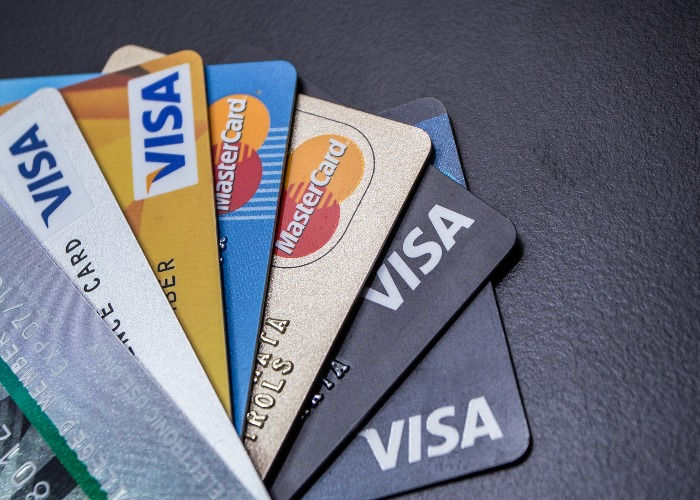

# 1. Get Dataset

## 1.1 Import and Install Libraries

In [1]:
# 1.1 Import and Install Libraries
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import pandas as pd
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# display all columns of the dataset
pd.pandas.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

#Confirmation
print('Libraries successfully installed')

Libraries successfully installed


In [2]:
""" Step 1: Get dataset """
# 1.2 Load dataset

# Reading the Application File - dataset for the features
apps = pd.read_csv('application_record.csv')

apps_copy = apps.copy() #making a copy
apps_copy

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [3]:
# Reading the Credit File - dataset for the target class
credit = pd.read_csv('credit_record.csv')

credit_copy = credit.copy() #making a copy
credit_copy

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


# 2. Exploratory Data Analysis and Feature Engineering

In [4]:
""" Step 2: Summarise the data """
# 2.1. Explore the features dataset

apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [5]:
# 2.2 Check features with missing value

apps.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [6]:
# 2.2.1 Check percentage of missing values

print(f'Percentage of missing values: = {round(apps["OCCUPATION_TYPE"].isnull().sum()/len(apps) * 100,2)}%')

Percentage of missing values: = 30.6%


In [7]:
# 2.2.2 Fill missing cells with "Unknown" => This is because missing % is high enough

apps['OCCUPATION_TYPE'].fillna("Unknown", inplace = True)

apps['OCCUPATION_TYPE'].value_counts()

Unknown                  134203
Laborers                  78240
Core staff                43007
Sales staff               41098
Managers                  35487
Drivers                   26090
High skill tech staff     17289
Accountants               15985
Medicine staff            13520
Cooking staff              8076
Security staff             7993
Cleaning staff             5845
Private service staff      3456
Low-skill Laborers         2140
Secretaries                2044
Waiters/barmen staff       1665
Realty agents              1041
HR staff                    774
IT staff                    604
Name: OCCUPATION_TYPE, dtype: int64

In [8]:
# 2.3 Check unique ID:

print("Number of unique IDs: {}".format(len(apps.ID.unique())))


Number of unique IDs: 438510


In [9]:
 # 2.4 Check duplicated IDs:

print("Number of duplicated records before dropping:",apps.ID.duplicated().sum())

Number of duplicated records before dropping: 47


In [10]:
# 2.4.1 Drop duplicated IDs => remember to put in a new variable when executing
df1 = apps.drop_duplicates(subset=['ID'], keep='last')

# Confirming non duplicated
print("Number of duplicated records after dropping: {}".format(df1.ID.duplicated().sum()))

Number of duplicated records after dropping: 0


In [11]:
# 2.5 Convert the categorical data to integer 1s and 0s values
def to_integers(self):

    # Converting the univariate categorical data to binary values for best results
    self.replace({'FLAG_OWN_CAR' : {'Y' : 1,  'N' : 0}}, inplace=True)
    self.replace({'FLAG_OWN_REALTY' : {'Y' : 1,  'N' : 0}},inplace=True)

    # Converting CNT_FAM_MEMBERS to whole number
    self['CNT_FAM_MEMBERS'] = self['CNT_FAM_MEMBERS'].astype(np.int64)

    # Converting the days to real age using pandas timedelta format
    self['AGE'] = np.ceil(pd.to_timedelta(self['DAYS_BIRTH'], unit='D').dt.days / -365.25).astype(np.int64)

    # values greater than zero means that the applicant doesn't work
    self.loc[(self['DAYS_EMPLOYED'] > 0), 'DAYS_EMPLOYED'] = 0

    # Converting the days of employment to total years using pandas timedelta format
    self['YEARS_EMPLOYED'] = np.ceil(pd.to_timedelta(self['DAYS_EMPLOYED'], unit='D').dt.days / -365.25).astype(np.int64)

    # converting categorical feature to 1s and 0s to enhance feature selection model
    self["Has_Partner"] = self["NAME_FAMILY_STATUS"].replace(["Civil marriage","Married","Single / not married",
                                                                              "Separated","Widow"],[1,1,0,0,0])

    # custom column creation for Household_Size: this adds 1 to count of children for only those with partners
    self["Household_Size"] = self["CNT_CHILDREN"] + self["Has_Partner"].apply(lambda x: 2 if x==1 else 1)

    return self

to_integers(df1)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED,Has_Partner,Household_Size
0,5008804,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Unknown,2,33,13,1,2
1,5008805,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Unknown,2,33,13,1,2
2,5008806,M,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2,59,4,1,2
3,5008808,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,53,9,0,1
4,5008809,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,53,9,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,0,1,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,0,1,0,0,0,Unknown,1,63,0,0,1
438553,6840222,F,0,0,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1,44,9,0,1
438554,6841878,F,0,0,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1,23,2,0,1
438555,6842765,F,0,1,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,0,1,0,0,0,Unknown,2,60,0,1,2


In [12]:
# 2.6 label encoding
def to_encoding(self):
    # housing type
    housing_type = {'House / apartment' : 'apartment',
                       'With parents': 'with_parents',
                        'Municipal apartment' : 'apartment',
                        'Rented apartment': 'apartment',
                        'Office apartment': 'apartment',
                        'Co-op apartment': 'apartment'}

    self['NAME_HOUSING_TYPE'] = self['NAME_HOUSING_TYPE'].map(housing_type)

    # family status
    family_status = {'Single / not married':'Single',
                         'Separated':'Single',
                         'Widow':'Single',
                         'Civil marriage':'Married',
                        'Married':'Married'}

    self['NAME_FAMILY_STATUS'] = self['NAME_FAMILY_STATUS'].map(family_status)

    # education type
    education_type = {'Secondary / secondary special':'Secondary',
                         'Lower secondary':'Secondary',
                         'Higher education':'Tertiary',
                         'Incomplete higher':'Tertiary',
                         'Academic degree':'Tertiary'}

    self['NAME_EDUCATION_TYPE'] = self['NAME_EDUCATION_TYPE'].map(education_type)

    # occupation type
    occupation_type = { 'Laborers'   :'unskilled',
                        'Sales staff': 'skilled',
                        'Core staff' : 'skilled',
                        'Managers'   : 'skilled',
                        'Drivers'    : 'unskilled',
                        'High skill tech staff' : 'skilled',
                        'Accountants'           : 'skilled',
                        'Medicine staff'        : 'skilled',
                        'Cooking staff'         : 'unskilled',
                        'Security staff'        : 'unskilled',
                        'Cleaning staff'        : 'unskilled',
                        'Private service staff' : 'unskilled',
                        'Low-skill Laborers'    : 'unskilled',
                        'Secretaries'           : 'skilled',
                        'Waiters/barmen staff'  : 'unskilled',
                        'Realty agents'         : 'skilled',
                        'HR staff'              : 'skilled',
                        'IT staff'              : 'skilled',
                        'Unknown'              : 'unknown'}

    self['OCCUPATION_TYPE'] = self['OCCUPATION_TYPE'].map(occupation_type)

    # income type
    income_type = {'Commercial associate':'Working',
                      'State servant':'Working',
                      'Working':'Working',
                      'Pensioner':'Pensioner',
                      'Student':'Student'}

    self['NAME_INCOME_TYPE'] = self['NAME_INCOME_TYPE'].map(income_type)

    #Dropping unused columns
    self.drop(columns=['DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_CHILDREN',"Has_Partner"], inplace =True)

    return self

to_encoding(df1)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED,Household_Size
0,5008804,M,1,1,427500.0,Working,Tertiary,Married,apartment,1,1,0,0,unknown,2,33,13,2
1,5008805,M,1,1,427500.0,Working,Tertiary,Married,apartment,1,1,0,0,unknown,2,33,13,2
2,5008806,M,1,1,112500.0,Working,Secondary,Married,apartment,1,0,0,0,unskilled,2,59,4,2
3,5008808,F,0,1,270000.0,Working,Secondary,Single,apartment,1,0,1,1,skilled,1,53,9,1
4,5008809,F,0,1,270000.0,Working,Secondary,Single,apartment,1,0,1,1,skilled,1,53,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,0,1,135000.0,Pensioner,Secondary,Single,apartment,1,0,0,0,unknown,1,63,0,1
438553,6840222,F,0,0,103500.0,Working,Secondary,Single,apartment,1,0,0,0,unskilled,1,44,9,1
438554,6841878,F,0,0,54000.0,Working,Tertiary,Single,with_parents,1,1,0,0,skilled,1,23,2,1
438555,6842765,F,0,1,72000.0,Pensioner,Secondary,Married,apartment,1,0,0,0,unknown,2,60,0,2


In [13]:
# 2.7 covert to dummy features
def hot_encoding(self):
    # Renaming long-labelled columns for better tags
    self.columns = ['ID', 'Gender', 'Car', 'Realty', 'Income', 'IncomeType',\
                    'Education', 'Marital', 'Rental', 'MobilePhone', 'WorkPhone', \
                    'OtherPhone', 'Email', 'Job', 'FamilySize', 'Age', 'Experience', 
                    'Household']

    # Setting the dummy features (one-hot encoding) to enhance feature selection
    df = pd.get_dummies(self, columns=['Gender', 'IncomeType', 'Education','Marital',"Rental", 'Job'])
    
    return df

df2 = hot_encoding(df1)
df2

,ID,Car,Realty,Income,MobilePhone,WorkPhone,OtherPhone,Email,FamilySize,Age,Experience,Household,Gender_F,Gender_M,IncomeType_Pensioner,IncomeType_Student,IncomeType_Working,Education_Secondary,Education_Tertiary,Marital_Married,Marital_Single,Rental_apartment,Rental_with_parents,Job_skilled,Job_unknown,Job_unskilled
0,5008804,1,1,427500.0,1,1,0,0,2,33,13,2,0,1,0,0,1,0,1,1,0,1,0,0,1,0
1,5008805,1,1,427500.0,1,1,0,0,2,33,13,2,0,1,0,0,1,0,1,1,0,1,0,0,1,0
2,5008806,1,1,112500.0,1,0,0,0,2,59,4,2,0,1,0,0,1,1,0,1,0,1,0,0,0,1
3,5008808,0,1,270000.0,1,0,1,1,1,53,9,1,1,0,0,0,1,1,0,0,1,1,0,1,0,0
4,5008809,0,1,270000.0,1,0,1,1,1,53,9,1,1,0,0,0,1,1,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,0,1,135000.0,1,0,0,0,1,63,0,1,0,1,1,0,0,1,0,0,1,1,0,0,1,0
438553,6840222,0,0,103500.0,1,0,0,0,1,44,9,1,1,0,0,0,1,1,0,0,1,1,0,0,0,1
438554,6841878,0,0,54000.0,1,1,0,0,1,23,2,1,1,0,0,0,1,0,1,0,1,0,1,1,0,0
438555,6842765,0,1,72000.0,1,0,0,0,2,60,0,2,1,0,1,0,0,1,0,1,0,1,0,0,1,0


In [14]:
# 2.8 Structure the Target Class according unique IDs from the credit dataset

# defining a function to categorise Target Class from credit dataset - "Default (1)" or "Not_Default(0)" on a new column, Target
def transform_target(self):
    '''
    for every unique ID, if status is "X" or "0" or "C", 
    let the new column say 0, otherwise say 1
    '''
    self["Target"] = [0 if Target in ["X", "0", "C"] else 1 for Target in self["STATUS"]]
    df = self[['ID', 'Target']].groupby("ID").Target.agg(lambda x : x.mode()[0]).reset_index() # aggregates the Target Class by highest 1s and 0s for each ID

    return df

df3 = transform_target(credit)
df3

,ID,Target
0,5001711,0
1,5001712,0
2,5001713,0
3,5001714,0
4,5001715,0
...,...,...
45980,5150482,0
45981,5150483,0
45982,5150484,0
45983,5150485,0


In [15]:
# 2.9 merge the target class to the data table
credit_app = pd.merge(df2, df3, on ='ID', how='inner')

# confirm for any duplicated ID
print("Number of duplicated IDs:",credit_app.ID.duplicated().sum())

credit_app

Number of duplicated IDs: 0


,ID,Car,Realty,Income,MobilePhone,WorkPhone,OtherPhone,Email,FamilySize,Age,Experience,Household,Gender_F,Gender_M,IncomeType_Pensioner,IncomeType_Student,IncomeType_Working,Education_Secondary,Education_Tertiary,Marital_Married,Marital_Single,Rental_apartment,Rental_with_parents,Job_skilled,Job_unknown,Job_unskilled,Target
0,5008804,1,1,427500.0,1,1,0,0,2,33,13,2,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0
1,5008805,1,1,427500.0,1,1,0,0,2,33,13,2,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0
2,5008806,1,1,112500.0,1,0,0,0,2,59,4,2,0,1,0,0,1,1,0,1,0,1,0,0,0,1,0
3,5008808,0,1,270000.0,1,0,1,1,1,53,9,1,1,0,0,0,1,1,0,0,1,1,0,1,0,0,0
4,5008809,0,1,270000.0,1,0,1,1,1,53,9,1,1,0,0,0,1,1,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,1,1,315000.0,1,0,0,0,2,48,7,2,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0
36453,5149834,0,1,157500.0,1,0,1,1,2,34,4,2,1,0,0,0,1,0,1,1,0,1,0,1,0,0,1
36454,5149838,0,1,157500.0,1,0,1,1,2,34,4,2,1,0,1,0,0,0,1,1,0,1,0,1,0,0,1
36455,5150049,0,1,283500.0,1,0,0,0,2,50,2,2,1,0,0,0,1,1,0,1,0,1,0,1,0,0,0


Shape after transforming to Target Class: (36457, 26)
Number of Non-Default Class = 36334
Number of Default Class = 123
Percent of Non-Default Class = 99.66%
Percent of Default Class = 0.34%


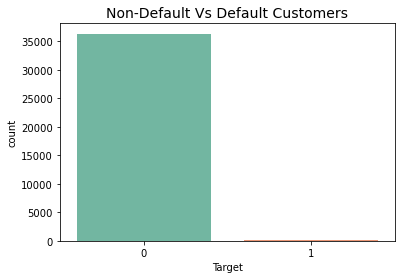

In [16]:
# 2.10 drop ID Key
credit_app.drop(columns = 'ID', inplace = True)

# Target Distribution
print("Shape after transforming to Target Class:", credit_app.shape)
print(f'Number of Non-Default Class = {credit_app["Target"].value_counts()[0]}')
print(f'Number of Default Class = {credit_app["Target"].value_counts()[1]}')
print(f'Percent of Non-Default Class = {round(credit_app["Target"].value_counts()[0]/len(credit_app) * 100,2)}%')
print(f'Percent of Default Class = {round(credit_app["Target"].value_counts()[1]/len(credit_app) * 100,2)}%')

sns.countplot('Target', data=credit_app, palette="Set2")
plt.title('Non-Default Vs Default Customers', fontsize=14)
plt.show()

<Figure size 720x720 with 0 Axes>

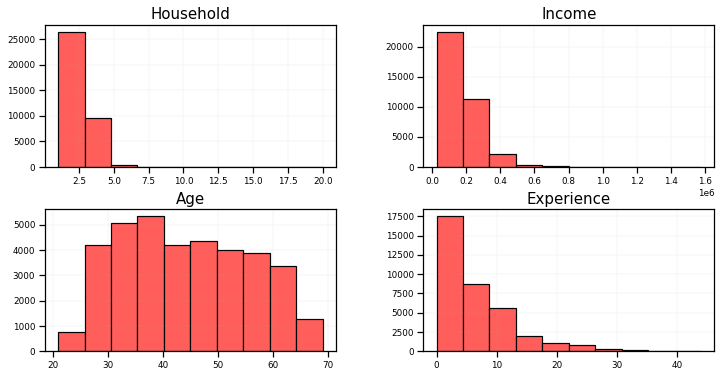

In [17]:
# 2.11 Data Visualization Analysis
#Customizing the seaborn chart designs

sns.set_context("notebook",font_scale=.8,rc={"grid.linewidth": 0.1,'patch.linewidth': 0.0,
    "axes.grid":True,
    "grid.linestyle": "-",
    "axes.titlesize" : 15,                                       
    "figure.autolayout":True})
                
color = '#FF5E5B'
palette2 = 'pastel'
palette3 = 'inferno'
palette4 = 'Set2'


# 2.11.1 Plot the numerical distribution
plt.figure(figsize=(10,10))

col_plot = ["Household","Income","Age","Experience"]
credit_app[col_plot].hist(edgecolor='black', linewidth=1.2, color=color)
fig=plt.gcf()
fig.set_size_inches(12,6)


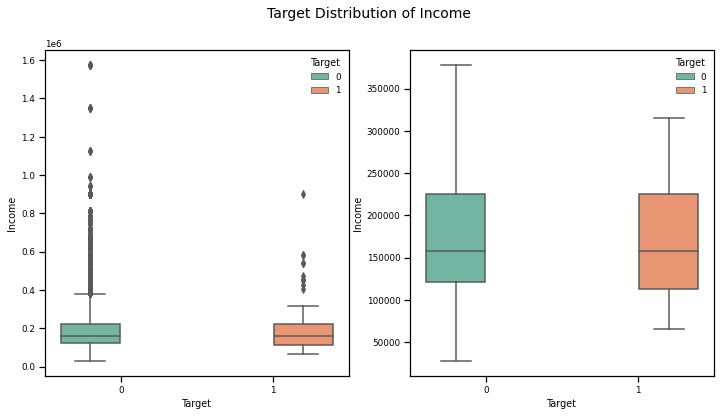

In [18]:
# 2.11.2 visualize the outliers in respect to the target

#income
fig, (ax1, ax2,) = plt.subplots(ncols=2, figsize=(12,6))
sns.boxplot(ax = ax1, x="Target", y="Income", hue="Target",data=credit_app, palette=palette4,showfliers=True)
sns.boxplot(ax = ax2, x="Target", y="Income", hue="Target",data=credit_app, palette=palette4,showfliers=False)

plt.suptitle('Target Distribution of Income', fontsize=14)
plt.show()



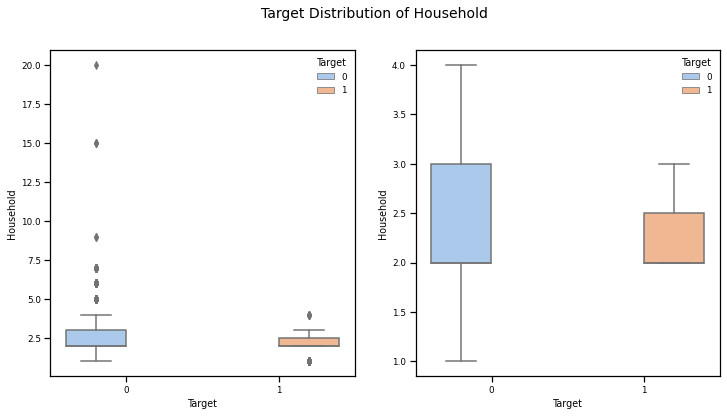

In [19]:
#household
fig, (ax1, ax2,) = plt.subplots(ncols=2, figsize=(12,6))
sns.boxplot(ax = ax1, x="Target", y="Household", hue="Target",data=credit_app, palette=palette2,showfliers=True)
sns.boxplot(ax = ax2, x="Target", y="Household", hue="Target",data=credit_app, palette=palette2,showfliers=False)

plt.suptitle('Target Distribution of Household', fontsize=14)
plt.show()

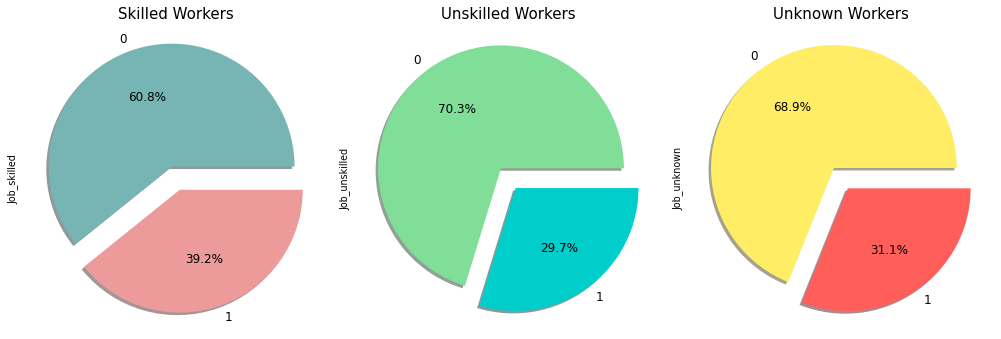

In [20]:
# 2.11.3 dummy feature distribution

#job type
fig, axes = plt.subplots(1,3)

Skilled= credit_app['Job_skilled'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True, colors=["#76B5B3","#EC9B9A"], textprops = {'fontsize':12}, ax=axes[0])
Skilled.set_title("Skilled Workers")

Unskilled= credit_app['Job_unskilled'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=["#80DE99","#00CECB"],textprops = {'fontsize':12}, ax=axes[1])
Unskilled.set_title("Unskilled Workers")

Unknown= credit_app['Job_unknown'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=['#FFED66','#FF5E5B'],textprops = {'fontsize':12}, ax=axes[2])
Unknown.set_title("Unknown Workers")

fig.set_size_inches(14,5)
plt.tight_layout()
plt.show()


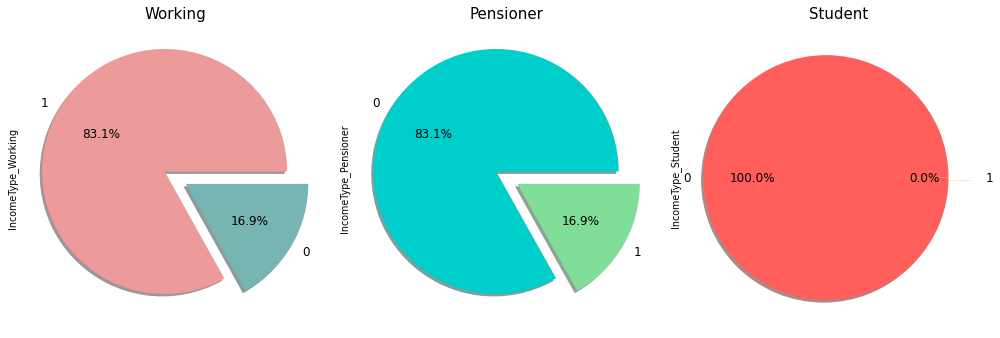

In [21]:
#earning type
fig, axes = plt.subplots(1,3)

Working= credit_app['IncomeType_Working'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True, colors=["#EC9B9A", "#76B5B3"], textprops = {'fontsize':12}, ax=axes[0])
Working.set_title("Working")

Pensioner= credit_app['IncomeType_Pensioner'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=["#00CECB", "#80DE99"],textprops = {'fontsize':12}, ax=axes[1])
Pensioner.set_title("Pensioner")

Student= credit_app['IncomeType_Student'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=['#FF5E5B', '#FFED66'],textprops = {'fontsize':12}, ax=axes[2])
Student.set_title("Student")

fig.set_size_inches(14,5)
plt.tight_layout()
plt.show()

In [22]:
# 2.12 Checking statistics of the numerical features
num_col = ["Household","Income","Age","Experience"]
credit_app[num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
Household,36457.0,2.198151,0.911857,1.0,2.0,2.0,3.0,20.0
Income,36457.0,186685.736662,101789.226482,27000.0,121500.0,157500.0,225000.0,1575000.0
Age,36457.0,44.231368,11.504127,21.0,35.0,43.0,54.0,69.0
Experience,36457.0,6.444496,6.570677,0.0,2.0,5.0,9.0,44.0


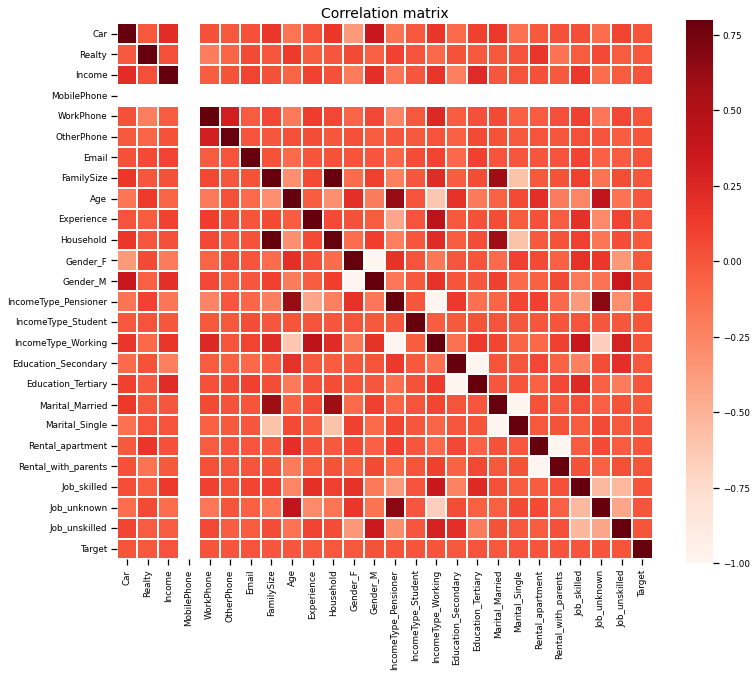

In [23]:
# 2.13 Correlation analysis
def corr_mat(self):
    colormap = plt.cm.Reds
    plt.figure(figsize=(12,10))
    sns.heatmap(self.corr(),linewidths=0.1,vmax=0.8, 
                square=True, cmap = colormap, linecolor='white')
    plt.title('Correlation matrix', fontsize=14)
    plt.show()
    
corr_mat(credit_app)

<Figure size 432x288 with 0 Axes>

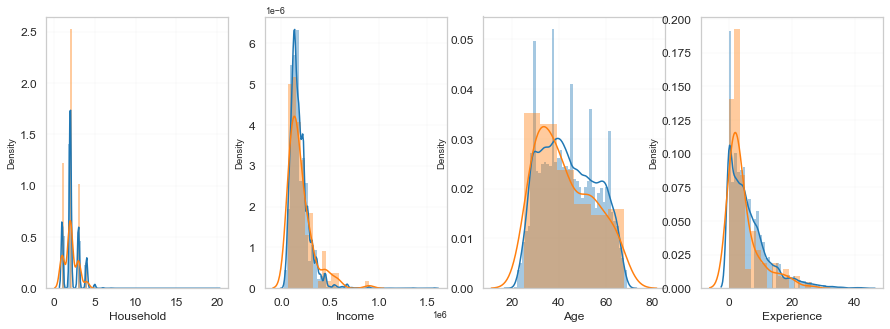

In [24]:
# 2.14 Target Distribution across all features
def density(self):
    num_col = ["Household","Income","Age","Experience"]
    var = self[num_col].columns.values 

    i = 0
    t0 = self.loc[self['Target'] == 0]
    t1 = self.loc[self['Target'] == 1]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(1,4,figsize=(15,5))

    for feature in var:
        i += 1
        plt.subplot(1,4,i)
        sns.distplot(t0[feature], label="Target = 0")
        sns.distplot(t1[feature], label="Target = 1")
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show()
    
density(credit_app)

# 3. Feature Selection and Data Preparation

In [25]:
# Import Libraries
import time
import plotly.express as px
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler  # avoid the outliner effect

import warnings
warnings.filterwarnings('ignore')

In [26]:
""" Step 3: Prepare and select best features for the training"""
# 3.1 Scale the numeric columns using Standard Scaler

# copy of datasets
df = credit_app.copy()
for i in num_col:
    
    # fit on training data column
    scale = StandardScaler().fit(df[[i]])
    
    # transform the training data column
    df[i] = scale.transform(df[[i]])
    
df


,Car,Realty,Income,MobilePhone,WorkPhone,OtherPhone,Email,FamilySize,Age,Experience,Household,Gender_F,Gender_M,IncomeType_Pensioner,IncomeType_Student,IncomeType_Working,Education_Secondary,Education_Tertiary,Marital_Married,Marital_Single,Rental_apartment,Rental_with_parents,Job_skilled,Job_unknown,Job_unskilled,Target
0,1,1,2.365845,1,1,0,0,2,-0.976304,0.997704,-0.217308,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0
1,1,1,2.365845,1,1,0,0,2,-0.976304,0.997704,-0.217308,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0
2,1,1,-0.728827,1,0,0,0,2,1.283786,-0.372036,-0.217308,0,1,0,0,1,1,0,1,0,1,0,0,0,1,0
3,0,1,0.818509,1,0,1,1,1,0.762227,0.388931,-1.313986,1,0,0,0,1,1,0,0,1,1,0,1,0,0,0
4,0,1,0.818509,1,0,1,1,1,0.762227,0.388931,-1.313986,1,0,0,0,1,1,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,1,1,1.260605,1,0,0,0,2,0.327594,0.084544,-0.217308,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0
36453,0,1,-0.286731,1,0,1,1,2,-0.889377,-0.372036,-0.217308,1,0,0,0,1,0,1,1,0,1,0,1,0,0,1
36454,0,1,-0.286731,1,0,1,1,2,-0.889377,-0.372036,-0.217308,1,0,1,0,0,0,1,1,0,1,0,1,0,0,1
36455,0,1,0.951138,1,0,0,0,2,0.501447,-0.676423,-0.217308,1,0,0,0,1,1,0,1,0,1,0,1,0,0,0


In [27]:
# 3.2. Remove unused column (FamilySize, IncomeType_Student, MobilePhone)
#FamilySize is same as the Household
#From the Correlation Analysis, MobilePhone has no correlation to the features
#From the data visualization, No student's data was in the dataset after joining with the Target

df.drop(columns=['FamilySize', 'IncomeType_Student', 'MobilePhone'], inplace=True) 
df

,Car,Realty,Income,WorkPhone,OtherPhone,Email,Age,Experience,Household,Gender_F,Gender_M,IncomeType_Pensioner,IncomeType_Working,Education_Secondary,Education_Tertiary,Marital_Married,Marital_Single,Rental_apartment,Rental_with_parents,Job_skilled,Job_unknown,Job_unskilled,Target
0,1,1,2.365845,1,0,0,-0.976304,0.997704,-0.217308,0,1,0,1,0,1,1,0,1,0,0,1,0,0
1,1,1,2.365845,1,0,0,-0.976304,0.997704,-0.217308,0,1,0,1,0,1,1,0,1,0,0,1,0,0
2,1,1,-0.728827,0,0,0,1.283786,-0.372036,-0.217308,0,1,0,1,1,0,1,0,1,0,0,0,1,0
3,0,1,0.818509,0,1,1,0.762227,0.388931,-1.313986,1,0,0,1,1,0,0,1,1,0,1,0,0,0
4,0,1,0.818509,0,1,1,0.762227,0.388931,-1.313986,1,0,0,1,1,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,1,1,1.260605,0,0,0,0.327594,0.084544,-0.217308,0,1,0,1,1,0,1,0,1,0,1,0,0,0
36453,0,1,-0.286731,0,1,1,-0.889377,-0.372036,-0.217308,1,0,0,1,0,1,1,0,1,0,1,0,0,1
36454,0,1,-0.286731,0,1,1,-0.889377,-0.372036,-0.217308,1,0,1,0,0,1,1,0,1,0,1,0,0,1
36455,0,1,0.951138,0,0,0,0.501447,-0.676423,-0.217308,1,0,0,1,1,0,1,0,1,0,1,0,0,0


In [28]:
# 3.3. Get sample data
# To reduce training time, resample data
n_sample = 5000
random_state = 42

non_default = df[df['Target'] == 0].sample(n_sample, random_state=random_state) #resample only from the majority class
default =  df[df['Target'] == 1]

# Merge 2 subset
sample = non_default.append(default).sample(frac=1, random_state=random_state).reset_index(drop=True)
y = sample["Target"].values

print("After resampling, Number of Default Instances : {}".format(sum(y==1)))
print("After resampling, Number of Non-Default Instances : {}".format(sum(y==0)))

sample

After resampling, Number of Default Instances : 123
After resampling, Number of Non-Default Instances : 5000


,Car,Realty,Income,WorkPhone,OtherPhone,Email,Age,Experience,Household,Gender_F,Gender_M,IncomeType_Pensioner,IncomeType_Working,Education_Secondary,Education_Tertiary,Marital_Married,Marital_Single,Rental_apartment,Rental_with_parents,Job_skilled,Job_unknown,Job_unskilled,Target
0,0,1,0.155365,0,0,0,-0.889377,0.084544,-1.313986,1,0,0,1,0,1,0,1,1,0,1,0,0,0
1,0,0,-1.303552,0,0,0,1.718418,-0.980810,-0.217308,0,1,1,0,1,0,1,0,1,0,0,1,0,0
2,0,1,-0.198312,0,0,0,-1.584789,-0.828616,-1.313986,1,0,0,1,0,1,0,1,1,0,1,0,0,0
3,1,0,-0.728827,0,0,0,0.588374,-0.676423,-0.217308,1,0,0,1,1,0,1,0,1,0,1,0,0,0
4,1,1,-0.949875,1,1,0,-0.280892,-0.676423,-0.217308,1,0,0,1,1,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5118,0,1,-0.507779,1,1,0,-1.324010,0.236737,0.879370,0,1,0,1,1,0,1,0,1,0,0,0,1,0
5119,0,0,-0.397255,0,0,0,-1.584789,-0.676423,-1.313986,0,1,0,1,1,0,0,1,1,0,0,0,1,0
5120,1,1,0.376413,0,0,0,-0.367818,0.541124,-0.217308,1,0,0,1,1,0,1,0,1,0,0,0,1,0
5121,1,1,1.039557,0,1,0,-1.497863,0.236737,-0.217308,0,1,0,1,1,0,1,0,0,1,0,0,1,0


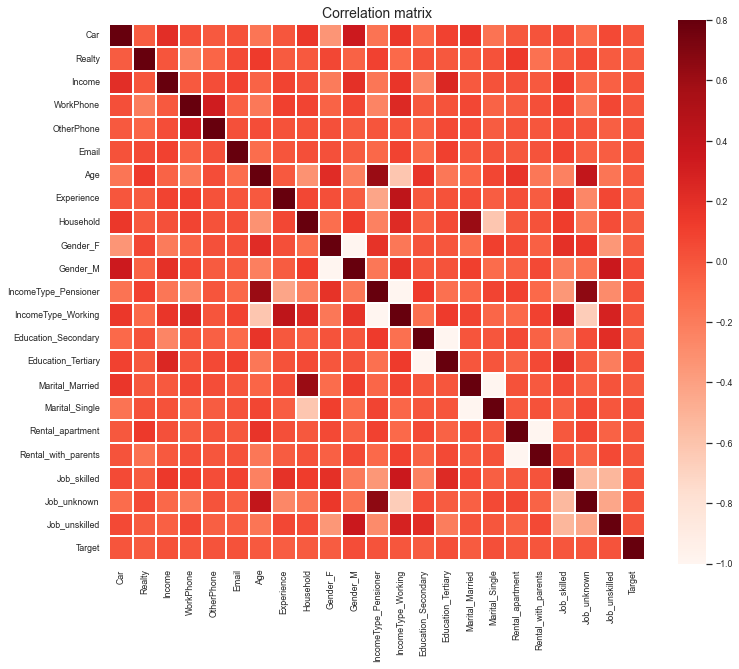

<Figure size 432x288 with 0 Axes>

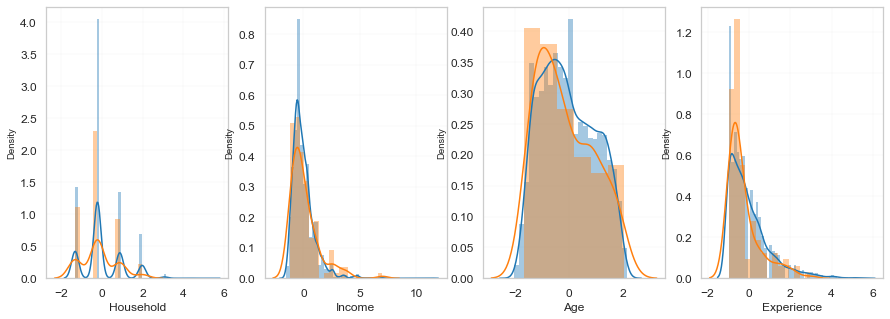

In [29]:
# 3.4 Sample visualisation
#correlation
corr_mat(sample)

#density
density(sample)

In [30]:
# 3.5 Feature Counts
#Independent and Dependent Variable
X = sample.drop(['Target'], axis = 1)
y = sample["Target"].values

# Train_Test Split samples for original dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, shuffle=True, stratify=y)
print(f"For the resample data of {n_sample} non-default instances:")
print("Shape of X_train dataset: ", X_train.shape)
print("Size of y_train dataset: ", y_train.shape[0])
print("Shape of X_test dataset: ", X_test.shape)
print("Size of y_test dataset: ", y_test.shape[0])
print("----------------------------------------------------")
print("Number of Default Instances in train set : {}".format(sum(y_train==1)))
print("Number of Non-Default Instances in train set : {}".format(sum(y_train==0)))
print("Number of Default Instances in test set : {}".format(sum(y_test==1)))
print("Number of Non-Default Instances in test set : {}".format(sum(y_test==0)))


For the resample data of 5000 non-default instances:
Shape of X_train dataset:  (4098, 22)
Size of y_train dataset:  4098
Shape of X_test dataset:  (1025, 22)
Size of y_test dataset:  1025
----------------------------------------------------
Number of Default Instances in train set : 98
Number of Non-Default Instances in train set : 4000
Number of Default Instances in test set : 25
Number of Non-Default Instances in test set : 1000


In [31]:
# 3.6 Train_Test Split samples for SMOTE oversampling
# Using SMOTE as oversampling Technique for handling imbalanced dataset

sm = SMOTE(sampling_strategy='minority', random_state=random_state)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
print('The number of target class before oversampling: {}'.format(y_train.shape[0]))
print('The number of target class after oversampling: {}'.format(y_train_sm.shape[0]))
print("----------------------------------------------------")
print("\nAfter OverSampling, counts of default: {}".format(sum(y_train_sm==1)))
print("After OverSampling, counts of non-default: {}".format(sum(y_train_sm==0)))


The number of target class before oversampling: 4098
The number of target class after oversampling: 8000
----------------------------------------------------

After OverSampling, counts of default: 4000
After OverSampling, counts of non-default: 4000


In [32]:
#3.7 Dimentionality reduction stratgey for feature selection
def apply_PCA(X_train, X_test, COMPONENTS=10):

    # Tranform X train, X test
    pca = PCA(n_components=COMPONENTS, random_state=random_state).fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    print("X_train_pca.shape: {}".format(X_train_pca.shape))

    return [X_train_pca, X_test_pca]

# 4. Modelling

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import tensorflow as tf 
from tensorflow import keras

from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score, roc_auc_score, accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,roc_auc_score,f1_score,plot_confusion_matrix,plot_roc_curve,roc_curve

import warnings
warnings.filterwarnings('ignore')

In [34]:
""" Step 4: Model the Algorithms for Prediction"""

# 4.1 Design ML model - Set up
# Design ML

classifiers = {
            "LogisiticRegression": LogisticRegression(random_state=random_state),
            "KNearest": KNeighborsClassifier(),
            "GradientBoost": GradientBoostingClassifier(random_state=random_state),
            "Random Forest Classifier": RandomForestClassifier(random_state=random_state),
            "XGBClassifier": XGBClassifier(random_state=random_state)
}

In [35]:
# 4.2 Cross Validation - Set up
# For reference, before applying Gridsearch CV to find best parameter
def cross_validate(X_train, y_train, cv=5):
    for key, classifier in classifiers.items():
        classifier.fit(X_train, y_train)
        training_score = cross_val_score(classifier, X_train, y_train, cv=cv)
        print("Classifiers: ", classifier.__class__.__name__, 
              "has a training accuracy score of", round(training_score.mean(),2) * 100, "%")

In [36]:
# 4.3 Best Parameter - Set up
# Use GridSearchCV to find the best parameters suitable for each model:
def model_best_estimator(X_train, y_train, class_weight=None, random_state=random_state, cv=5):
    
    # Logistic Regression 
    t0 = time.time()
    LR_params_grid = {"solver": ["liblinear", "sag", "lbfgs"], "penalty":['l2'],
                       'C': [0.01, 0.1, 1, 100]}

    grid_LR = GridSearchCV(LogisticRegression(random_state=random_state, class_weight=class_weight, max_iter=10000),
                                LR_params_grid, cv=cv, n_jobs=4)
    grid_LR.fit(X_train, y_train)

    # get the logistic regression with the best parameters.
    LR = grid_LR.best_estimator_
    t1 = time.time()

    print("Best fit parameter for Logistic Regression", LR)
    print("Elapsed time {:.2f} s".format(t1 - t0))

    
    # KNN
    t2 = time.time()
    KNN_params_grid = {"n_neighbors": list(range(2,8,1)), 
                          "metric": ('minkowski', 'euclidean', 'manhattan')}
    
    grid_KNN = GridSearchCV(KNeighborsClassifier(), KNN_params_grid, cv=cv)
    grid_KNN.fit(X_train, y_train)
   
    # KNN best estimator
    KNN = grid_KNN.best_estimator_
    t3 = time.time()
    print("\nBest fit parameter for KNN", KNN)
    print("Effective metric:", KNN.effective_metric_)
    print("Elapsed time {:.2f} s".format(t3 - t2))
    
    
    # GradientBoost Classifier:
    t4 = time.time()
    GB_params_grid = {"max_depth": list(range(2,6,1)),
                "min_samples_leaf": list(range(2,7,1))}
    
    grid_GB = GridSearchCV(GradientBoostingClassifier(random_state=random_state),
                             GB_params_grid, cv=cv)
    grid_GB.fit(X_train, y_train)
    
    # gboost best estimator
    GB = grid_GB.best_estimator_
    t5 = time.time()
    
    print("\nBest fit parameter for Gradient Boost:", GB)
    print("Elapsed time {:.2f} s".format(t5 - t4))

    # Random Forest Classifier
    t6 = time.time()
    RF_params_grid = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,6,1)),
                "min_samples_leaf": list(range(2,7,1))}

    grid_RF = GridSearchCV(RandomForestClassifier(random_state=random_state, class_weight=class_weight), 
                           RF_params_grid, cv=cv)
    grid_RF.fit(X_train, y_train)

    # random forest best estimator
    RF = grid_RF.best_estimator_
    t7 = time.time()

    print("\nBest fit parameter for Random Forest:", RF)
    print("Elapsed time {:.2f} s".format(t7 - t6))
    
    # XGBoost Classifier
    t8 = time.time()
    XGB_params_grid = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,6,1)),
                "min_samples_leaf": list(range(2,7,1))}

    grid_XGB = GridSearchCV(XGBClassifier(random_state=random_state, class_weight=class_weight), 
                           XGB_params_grid, cv=cv)
    grid_XGB.fit(X_train, y_train)

    # random forest best estimator
    XGB = grid_XGB.best_estimator_
    t9 = time.time()

    print("\nBest fit parameter for XGBoost:", XGB)
    print("Elapsed time {:.2f} s".format(t9 - t8))
    
    return [LR, KNN, GB, RF, XGB]   

In [37]:
# 4.4 Evaluate model by using cross validation - setup
def evaluate_model(classifier, X_train, y_train, cv=5):
    classifier.fit(X_train, y_train)
    score = cross_val_score(classifier, X_train, y_train, cv=cv)
    return score

In [38]:
# 4.5 Get training model results - setup
def train_model(classifier, X_train, y_train, cv=5):
    y_train_pred = cross_val_predict(classifier, X_train, y_train, cv=cv)
    print(classification_report(y_train, y_train_pred, labels=[1,0])) 

In [39]:
# 4.6 Get testing model results - setup
def predict_model(classifier, X_test, y_test):
    y_pred = classifier.predict(X_test)
    print(classification_report(y_test, y_pred, labels=[1,0]))
    
    # Confusion Matrix
    print('Confusion matrix:', classifier)
    cf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
    ax =sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Default', 'Not Default'],
                yticklabels=['Default', 'NOt Default'])
    ax.set(xlabel="Predicted outputs", ylabel = "Actual outputs")
    plt.show()

In [40]:
# 4.7 Plot ROC - setup
def plot_result(LR, KNN, GB, RF, XGB, X_train, y_train, cv=5):
    # Get probability of y train predict:
    LR_pred = cross_val_predict(LR, X_train, y_train, cv=cv,
                             method="decision_function")
    KNN_pred = cross_val_predict(KNN, X_train, y_train, 
                                method='predict_proba', cv=cv)[:,1]
    GB_pred = cross_val_predict(GB, X_train, y_train, 
                                method='predict_proba', cv=cv)[:,1]
    RF_pred = cross_val_predict(RF, X_train, y_train, 
                                method='predict_proba', cv=cv)[:,1]
    XGB_pred = cross_val_predict(XGB, X_train, y_train, 
                                method='predict_proba', cv=cv)[:,1]
    
    # calculate fpr and tpr and threshold
    LR_fpr, LR_tpr, LR_thresold = roc_curve(y_train, LR_pred, pos_label=1)
    KNN_fpr, KNN_tpr, KNN_threshold = roc_curve(y_train, KNN_pred, pos_label=1)
    GB_fpr, GB_tpr, GB_threshold = roc_curve(y_train, GB_pred, pos_label=1)
    RF_fpr, RF_tpr, RF_threshold = roc_curve(y_train, RF_pred, pos_label=1)
    XGB_fpr, XGB_tpr, XGB_threshold = roc_curve(y_train, XGB_pred, pos_label=1)

    # Plot ROC
    
    f, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))
    
    ax2.plot(LR_fpr, LR_tpr, 
             label='Logistic Regression Classifier Score: {:.3f}'.format(roc_auc_score(y_train, LR_pred, labels=[1,0])))
    ax2.plot(KNN_fpr, KNN_tpr, 
             label='KNears Neighbors Classifier Score: {:.3f}'.format(roc_auc_score(y_train, KNN_pred, labels=[1,0])))
    ax2.plot(GB_fpr, GB_tpr, 
             label='Gradient Boost Classifier Score: {:.3f}'.format(roc_auc_score(y_train, GB_pred, labels=[1,0])))
    ax2.plot(RF_fpr, RF_tpr, 
             label='Random Forest Classifier Score: {:.3f}'.format(roc_auc_score(y_train, RF_pred, labels=[1,0])))
    ax2.plot(XGB_fpr, XGB_tpr, 
             label='XGBoost Classifier Score: {:.3f}'.format(roc_auc_score(y_train, XGB_pred, labels=[1,0])))
    ax2.plot([0, 1], [0, 1], 'k--')
    #ax2.axis([-0.01, 1, 0, 1])
    ax2.set_xlabel('False Positive Rate', fontsize=16)
    ax2.set_ylabel('True Positive Rate', fontsize=16)
    ax2.set_title('ROC Curve', fontsize=18)
    ax2.legend(loc = 'best')
    
    
    # calc precision, recall and thresholds
    LR_precision, LR_recall, LR_thres_pr = precision_recall_curve(y_train, LR_pred, pos_label=1)
    KNN_precision, KNN_recall, KNN_thres_pr = precision_recall_curve(y_train, KNN_pred,  pos_label=1)
    GB_precision, GB_recall, GB_thres_pr = precision_recall_curve(y_train, GB_pred,  pos_label=1)
    RF_precision, RF_recall, RF_thres_pr = precision_recall_curve(y_train, RF_pred, pos_label=1)
    XGB_precision, XGB_recall, XGB_thres_pr = precision_recall_curve(y_train, XGB_pred, pos_label=1)
    
    # Plot precision-recall curve
    ax1.plot(LR_precision, LR_recall, 
             label="Logistic Regression Classifier avg precision: {:0.3f}".format(average_precision_score(y_train, LR_pred)))
    ax1.plot(KNN_precision, KNN_recall, 
             label='KNears Neighbors Classifier avg precision: {:.3f}'.format(average_precision_score(y_train, KNN_pred)))
    ax1.plot(GB_precision, GB_recall, 
             label='Gradient Boost Classifier avg precision: {:.3f}'.format(average_precision_score(y_train, GB_pred)))
    ax1.plot(RF_precision, RF_recall, 
             label='Random Forest Classifier avg precision: {:.3f}'.format(average_precision_score(y_train, RF_pred)))
    ax1.plot(XGB_precision, XGB_recall, 
             label='XGBoost Classifier avg precision: {:.3f}'.format(average_precision_score(y_train, XGB_pred)))
    ax1.set_xlabel('Precision', fontsize = 16)
    ax1.set_ylabel('Recall', fontsize = 16)
    #ax1.axis([-0.01, 1, 0, 1])
    ax1.set_title('Precision-Recall Curve', fontsize = 18)
    ax1.legend(loc = 'best')
   
    plt.show()

In [41]:
# 4.8 Set up function for training and testing flow
# Start by finding the best parameter for ML model, train and get result + visualize the results

def train_test(X_train, y_train, X_test, y_test, random_state=random_state, class_weight=None, cv=5):
    
    # Find best parameter for model
    model_select_result = model_best_estimator(X_train, y_train, class_weight=class_weight)
    
    LR, KNN, GB, RF, XGB = model_select_result
    
    
    # Train and get result
    for classifier in model_select_result:
        print("\nPredict model:", classifier)
        evaluate_model(classifier, X_train, y_train, cv=cv)
        print("\nTraining result:")
        train_model(classifier, X_train, y_train, cv=cv)
        print("Testing result:")
        predict_model(classifier, X_test, y_test)
        
    
    # Plot result (ROC, Precision)
    print('Plot for training results')
    plot_result(LR, KNN, GB, RF, XGB, X_train, y_train)
    print('Plot for test results')
    plot_result(LR, KNN, GB, RF, XGB, X_test, y_test)
    
    
    #can add feature importance
    return [LR, KNN, GB, RF, XGB]

In [42]:
## 4.9 Setup for Deep Learning Model
def ANN_model(X_train, y_train, X_test, y_test, epochs=5):
    
    #design model
    model = keras.Sequential([
        keras.layers.Dense(18, input_shape=(22,), activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    
    #compile model
    model.compile(optimizer = 'adam',
                 loss = 'binary_crossentropy',
                 metrics =['accuracy'])
    
    #fit model
    model.fit(X_train, y_train, epochs=epochs)
    
    # evaluate model
    print(f'model evaluation :', model.evaluate(X_test, y_test))
    
    # build prediction series
    yp = model.predict(X_test)
    y_pred =[]
    for element in yp:
        if element > 0.5:
            y_pred.append(1)
        else: 
            y_pred.append(0)
            
    mse = np.mean(np.power(X_test - yp, 2), axis=1)
    error = pd.DataFrame({'reconstruction_error': mse,
                            'true_class': y_test})    
    
    print(error.describe())
            
    #result
    print(classification_report(y_test, y_pred, labels=[1,0]))
    
    # Confusion Matrix
    print('Confusion matrix:', model)
    cf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
    ax =sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Default', 'Not Default'],
                yticklabels=['Default', 'NOt Default'])
    ax.set(xlabel="Predicted outputs", ylabel = "Actual outputs")
    plt.show()

    # Plot ROC
    fpr, tpr, thres_roc = roc_curve(error.true_class, error.reconstruction_error)
    roc_auc = roc_auc_score(error.true_class, error.reconstruction_error, labels=[1,0])

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, label='AUC = %0.3f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.001, 1])
    plt.ylim([0, 1.001])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
     # Plot Precision and recall
    precision, recall, thres_pr = precision_recall_curve(error.true_class, error.reconstruction_error,  pos_label=1)
    plt.plot(precision, recall, label= 'Avg precision = {:0.3f}'.format(average_precision_score(error.true_class, error.reconstruction_error)))
    plt.title('Precision-Recall Curve')
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.legend(loc='best')
    plt.show()


# 5. Train-Test Results


************* Classification Normal Case - Baseline **************
Initial evaluate training model
Classifiers:  LogisticRegression has a training accuracy score of 98.0 %
Classifiers:  KNeighborsClassifier has a training accuracy score of 97.0 %
Classifiers:  GradientBoostingClassifier has a training accuracy score of 98.0 %
Classifiers:  RandomForestClassifier has a training accuracy score of 98.0 %
[05:43:11] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:43:12] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:43:12] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluat

[05:46:22] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:46:22] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:46:22] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any su

[05:46:25] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:46:25] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:46:25] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any su

[05:46:27] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:46:27] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:46:27] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:46:27] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  Th

[05:46:29] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:46:30] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:46:30] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:46:30] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  Th

[05:46:33] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:46:33] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:46:33] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any su

[05:46:36] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:46:36] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:46:36] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any su

[05:46:40] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:46:40] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:46:40] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any su

[05:46:43] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:46:43] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:46:43] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any su

[05:46:46] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:46:46] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:46:46] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any su

[05:46:48] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:46:48] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:46:48] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any su

[05:46:51] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:46:51] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:46:51] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:46:51] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  Th

[05:46:54] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:46:54] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:46:54] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any su

[05:46:57] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:46:57] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:46:57] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any su

[05:47:00] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:47:00] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:47:00] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any su

[05:47:04] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:47:04] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:47:04] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any su

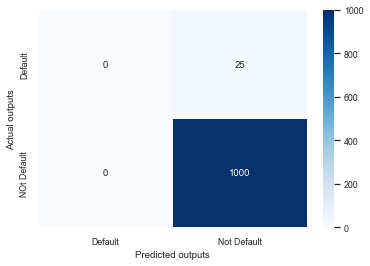


Predict model: KNeighborsClassifier(n_neighbors=6)

Training result:
              precision    recall  f1-score   support

           1       0.67      0.02      0.04        98
           0       0.98      1.00      0.99      4000

    accuracy                           0.98      4098
   macro avg       0.82      0.51      0.51      4098
weighted avg       0.97      0.98      0.97      4098

Testing result:
              precision    recall  f1-score   support

           1       0.50      0.04      0.07        25
           0       0.98      1.00      0.99      1000

    accuracy                           0.98      1025
   macro avg       0.74      0.52      0.53      1025
weighted avg       0.96      0.98      0.97      1025

Confusion matrix: KNeighborsClassifier(n_neighbors=6)


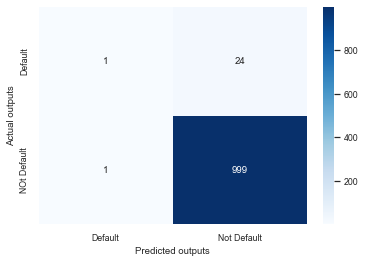


Predict model: GradientBoostingClassifier(max_depth=5, min_samples_leaf=2, random_state=42)

Training result:
              precision    recall  f1-score   support

           1       0.67      0.18      0.29        98
           0       0.98      1.00      0.99      4000

    accuracy                           0.98      4098
   macro avg       0.82      0.59      0.64      4098
weighted avg       0.97      0.98      0.97      4098

Testing result:
              precision    recall  f1-score   support

           1       0.67      0.24      0.35        25
           0       0.98      1.00      0.99      1000

    accuracy                           0.98      1025
   macro avg       0.82      0.62      0.67      1025
weighted avg       0.97      0.98      0.97      1025

Confusion matrix: GradientBoostingClassifier(max_depth=5, min_samples_leaf=2, random_state=42)


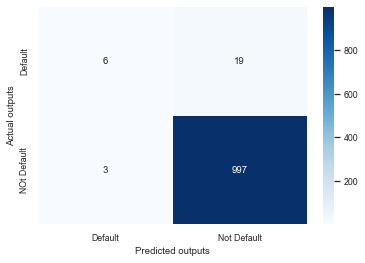


Predict model: RandomForestClassifier(max_depth=2, min_samples_leaf=2, random_state=42)

Training result:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        98
           0       0.98      1.00      0.99      4000

    accuracy                           0.98      4098
   macro avg       0.49      0.50      0.49      4098
weighted avg       0.95      0.98      0.96      4098

Testing result:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        25
           0       0.98      1.00      0.99      1000

    accuracy                           0.98      1025
   macro avg       0.49      0.50      0.49      1025
weighted avg       0.95      0.98      0.96      1025

Confusion matrix: RandomForestClassifier(max_depth=2, min_samples_leaf=2, random_state=42)


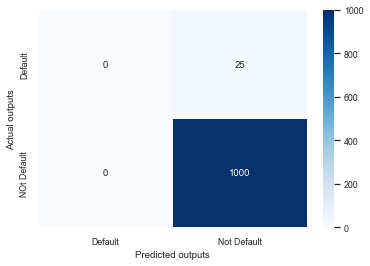


Predict model: XGBClassifier(base_score=0.5, booster='gbtree', class_weight=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              criterion='gini', enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, min_samples_leaf=2, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, ...)
[05:47:25] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually bei

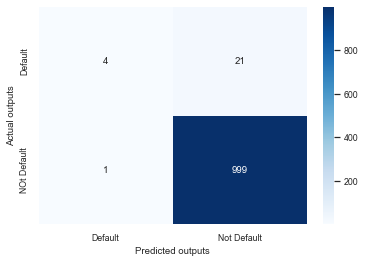

Plot for training results
[05:47:36] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:47:36] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:47:36] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open a

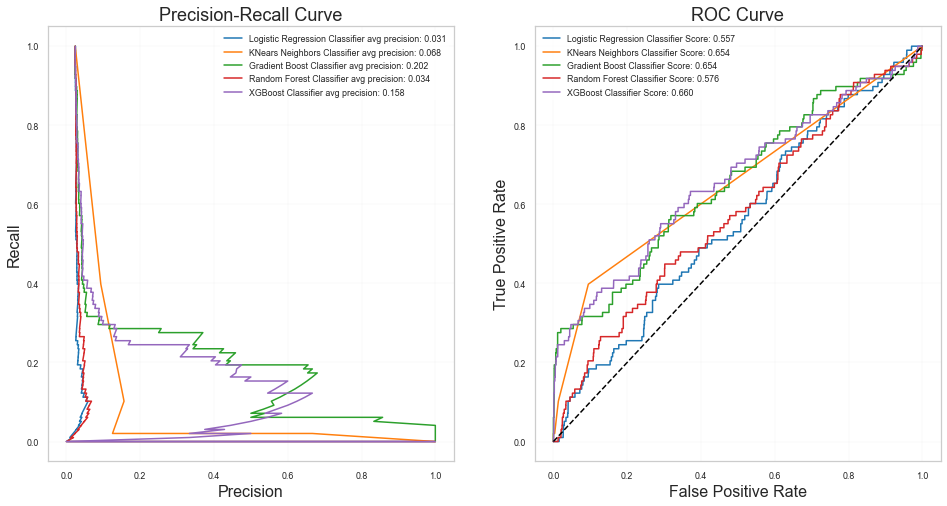

Plot for test results
[05:47:42] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:47:42] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:47:42] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an is

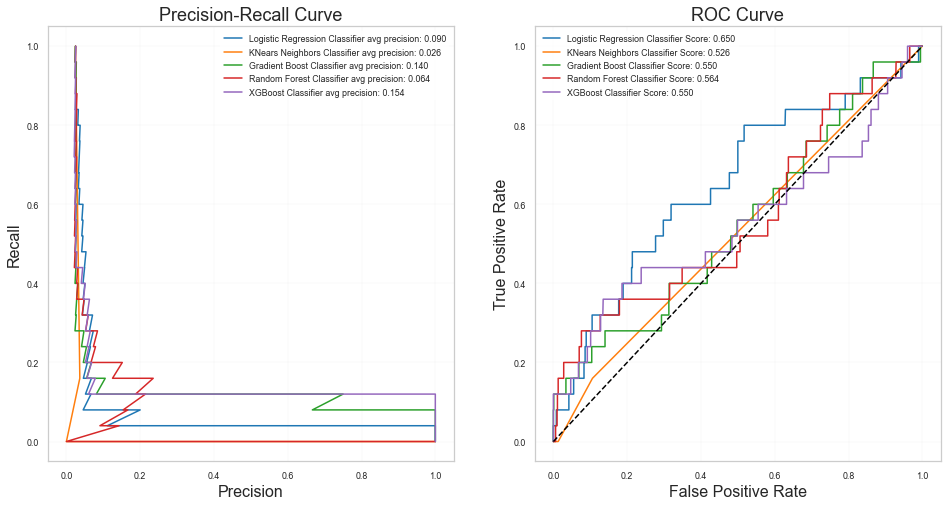

In [43]:
# 5.1.1 Classification Models with Normal Dataset
### Experiment 1a: Baseline - Without doing any sampling or pca to resolve imbalance problem

print("\n************* Classification Normal Case - Baseline **************")

# Intially evaluate train model with 5 fold cross-validation
print("Initial evaluate training model")
cross_validate(X_train, y_train)

# Evaluate model and get result
LR, KNN, GB, RF, XGB = train_test(X_train, y_train, X_test, y_test)

X_train_pca.shape: (4098, 10)

************* PCA applied on Baseline case **************
Best fit parameter for Logistic Regression LogisticRegression(C=0.01, max_iter=10000, random_state=42, solver='liblinear')
Elapsed time 0.43 s

Best fit parameter for KNN KNeighborsClassifier(metric='manhattan', n_neighbors=6)
Effective metric: manhattan
Elapsed time 8.42 s

Best fit parameter for Gradient Boost: GradientBoostingClassifier(max_depth=5, min_samples_leaf=3, random_state=42)
Elapsed time 226.30 s

Best fit parameter for Random Forest: RandomForestClassifier(max_depth=2, min_samples_leaf=2, random_state=42)
Elapsed time 166.30 s
[05:54:25] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find a

[05:54:27] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:54:27] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:54:27] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any su

[05:54:30] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:54:30] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:54:30] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any su

[05:54:34] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:54:34] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:54:34] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any su

[05:54:38] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:54:38] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:54:38] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any su

[05:54:43] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:54:43] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:54:43] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any su

[05:54:48] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:54:48] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:54:48] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any su

[05:54:54] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:54:54] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:54:54] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any su

[05:54:59] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:54:59] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:54:59] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any su

[05:55:02] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:55:02] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:55:02] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any su

[05:55:05] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:55:05] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:55:05] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any su

[05:55:09] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:55:09] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:55:09] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any su

[05:55:13] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:55:13] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:55:13] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any su

[05:55:18] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:55:18] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:55:18] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any su

[05:55:23] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:55:23] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:55:24] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any su

[05:55:29] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:55:29] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:55:30] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any su

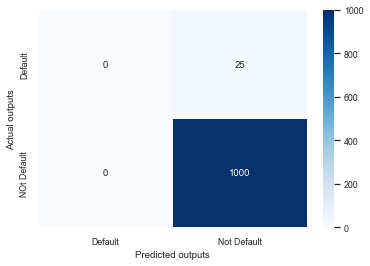


Predict model: KNeighborsClassifier(metric='manhattan', n_neighbors=6)

Training result:
              precision    recall  f1-score   support

           1       0.50      0.02      0.04        98
           0       0.98      1.00      0.99      4000

    accuracy                           0.98      4098
   macro avg       0.74      0.51      0.51      4098
weighted avg       0.97      0.98      0.97      4098

Testing result:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        25
           0       0.98      1.00      0.99      1000

    accuracy                           0.98      1025
   macro avg       0.49      0.50      0.49      1025
weighted avg       0.95      0.98      0.96      1025

Confusion matrix: KNeighborsClassifier(metric='manhattan', n_neighbors=6)


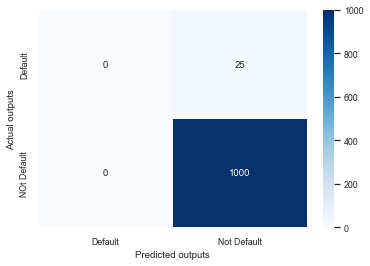


Predict model: GradientBoostingClassifier(max_depth=5, min_samples_leaf=3, random_state=42)

Training result:
              precision    recall  f1-score   support

           1       0.58      0.19      0.29        98
           0       0.98      1.00      0.99      4000

    accuracy                           0.98      4098
   macro avg       0.78      0.60      0.64      4098
weighted avg       0.97      0.98      0.97      4098

Testing result:
              precision    recall  f1-score   support

           1       0.57      0.16      0.25        25
           0       0.98      1.00      0.99      1000

    accuracy                           0.98      1025
   macro avg       0.78      0.58      0.62      1025
weighted avg       0.97      0.98      0.97      1025

Confusion matrix: GradientBoostingClassifier(max_depth=5, min_samples_leaf=3, random_state=42)


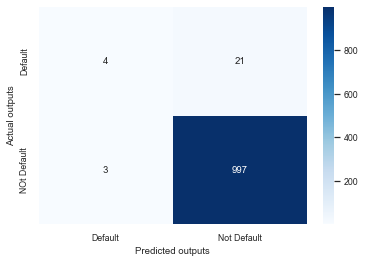


Predict model: RandomForestClassifier(max_depth=2, min_samples_leaf=2, random_state=42)

Training result:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        98
           0       0.98      1.00      0.99      4000

    accuracy                           0.98      4098
   macro avg       0.49      0.50      0.49      4098
weighted avg       0.95      0.98      0.96      4098

Testing result:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        25
           0       0.98      1.00      0.99      1000

    accuracy                           0.98      1025
   macro avg       0.49      0.50      0.49      1025
weighted avg       0.95      0.98      0.96      1025

Confusion matrix: RandomForestClassifier(max_depth=2, min_samples_leaf=2, random_state=42)


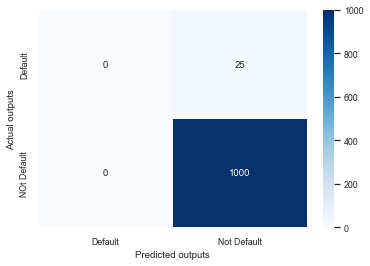


Predict model: XGBClassifier(base_score=0.5, booster='gbtree', class_weight=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              criterion='gini', enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, min_samples_leaf=2, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, ...)
[05:56:15] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually bei

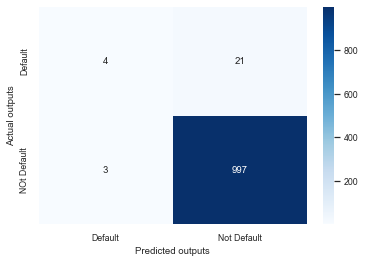

Plot for training results
[05:56:38] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:56:38] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:56:39] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open a

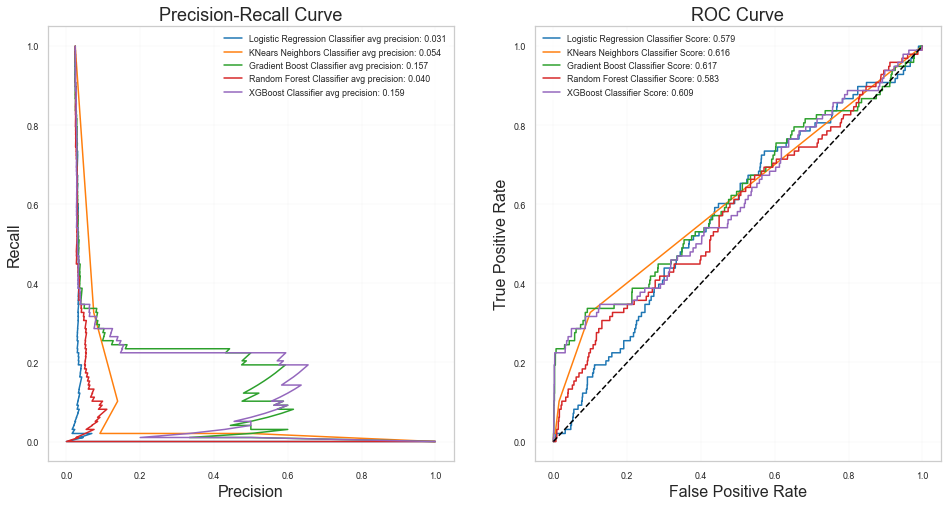

Plot for test results
[05:56:47] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:56:47] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:56:47] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an is

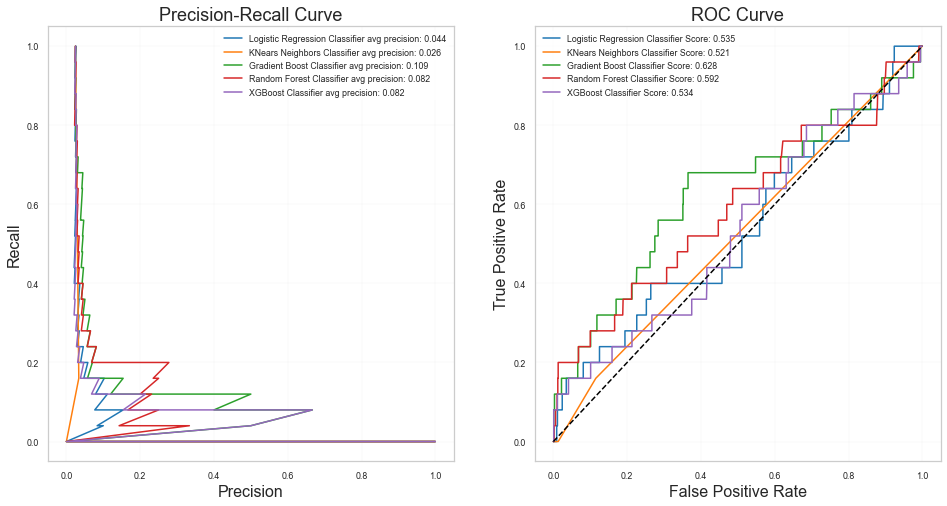

[LogisticRegression(C=0.01, max_iter=10000, random_state=42, solver='liblinear'),
 KNeighborsClassifier(metric='manhattan', n_neighbors=6),
 GradientBoostingClassifier(max_depth=5, min_samples_leaf=3, random_state=42),
 RandomForestClassifier(max_depth=2, min_samples_leaf=2, random_state=42),
 XGBClassifier(base_score=0.5, booster='gbtree', class_weight=None,
               colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
               criterion='gini', enable_categorical=False, gamma=0, gpu_id=-1,
               importance_type=None, interaction_constraints='',
               learning_rate=0.300000012, max_delta_step=0, max_depth=4,
               min_child_weight=1, min_samples_leaf=2, missing=nan,
               monotone_constraints='()', n_estimators=100, n_jobs=8,
               num_parallel_tree=1, predictor='auto', random_state=42,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', validate_parameters=1, ..

In [44]:
### Experiment 1b: PCA applied on Normal case
# 5.1.2 Apply pca for first n components to reduce dimensions
# and then train model with the new data
n = 10
X_train_pca, X_test_pca = apply_PCA(X_train, X_test, COMPONENTS=n)

print("\n************* PCA applied on Baseline case **************")
train_test(X_train_pca, y_train, X_test_pca, y_test)


************* Classification Oversampling Case - SMOTE **************
Initial evaluate training model
Classifiers:  LogisticRegression has a training accuracy score of 98.0 %
Classifiers:  KNeighborsClassifier has a training accuracy score of 97.0 %
Classifiers:  GradientBoostingClassifier has a training accuracy score of 98.0 %
Classifiers:  RandomForestClassifier has a training accuracy score of 98.0 %
[05:56:57] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:56:57] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:56:58] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default eval

[06:03:23] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:03:23] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:03:24] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any su

[06:03:26] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:03:26] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:03:27] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any su

[06:03:30] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:03:30] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:03:31] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any su

[06:03:35] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:03:35] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:03:35] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any su

[06:03:40] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:03:40] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:03:40] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any su

[06:03:45] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:03:45] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:03:45] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any su

[06:03:51] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:03:51] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:03:52] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any su

[06:03:57] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:03:57] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:03:58] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any su

[06:04:01] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:04:01] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:04:01] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any su

[06:04:04] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:04:04] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:04:04] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any su

[06:04:08] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:04:08] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:04:09] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any su

[06:04:13] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:04:13] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:04:13] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any su

[06:04:18] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:04:18] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:04:18] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any su

[06:04:23] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:04:23] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:04:24] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any su

[06:04:30] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:04:30] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:04:30] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any su

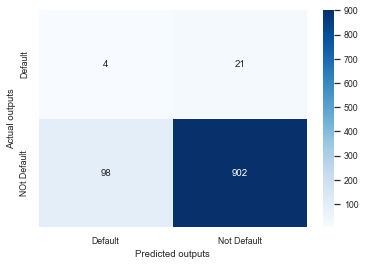


Predict model: KNeighborsClassifier(metric='manhattan', n_neighbors=2)

Training result:
              precision    recall  f1-score   support

           1       0.97      0.96      0.97      4000
           0       0.96      0.97      0.97      4000

    accuracy                           0.97      8000
   macro avg       0.97      0.97      0.97      8000
weighted avg       0.97      0.97      0.97      8000

Testing result:
              precision    recall  f1-score   support

           1       0.17      0.20      0.19        25
           0       0.98      0.98      0.98      1000

    accuracy                           0.96      1025
   macro avg       0.58      0.59      0.58      1025
weighted avg       0.96      0.96      0.96      1025

Confusion matrix: KNeighborsClassifier(metric='manhattan', n_neighbors=2)


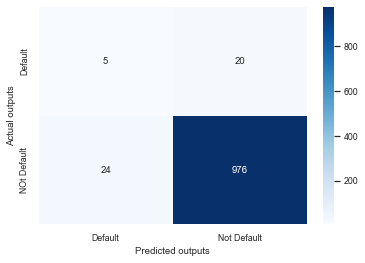


Predict model: GradientBoostingClassifier(max_depth=5, min_samples_leaf=6, random_state=42)

Training result:
              precision    recall  f1-score   support

           1       0.98      0.98      0.98      4000
           0       0.98      0.98      0.98      4000

    accuracy                           0.98      8000
   macro avg       0.98      0.98      0.98      8000
weighted avg       0.98      0.98      0.98      8000

Testing result:
              precision    recall  f1-score   support

           1       0.20      0.16      0.18        25
           0       0.98      0.98      0.98      1000

    accuracy                           0.96      1025
   macro avg       0.59      0.57      0.58      1025
weighted avg       0.96      0.96      0.96      1025

Confusion matrix: GradientBoostingClassifier(max_depth=5, min_samples_leaf=6, random_state=42)


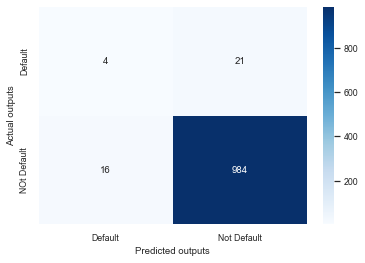


Predict model: RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       random_state=42)

Training result:
              precision    recall  f1-score   support

           1       0.86      0.90      0.88      4000
           0       0.89      0.85      0.87      4000

    accuracy                           0.87      8000
   macro avg       0.88      0.87      0.87      8000
weighted avg       0.88      0.87      0.87      8000

Testing result:
              precision    recall  f1-score   support

           1       0.05      0.32      0.09        25
           0       0.98      0.85      0.91      1000

    accuracy                           0.84      1025
   macro avg       0.52      0.58      0.50      1025
weighted avg       0.96      0.84      0.89      1025

Confusion matrix: RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       random_state=42)


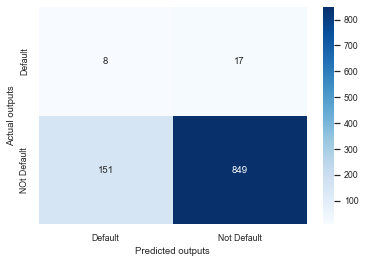


Predict model: XGBClassifier(base_score=0.5, booster='gbtree', class_weight=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              criterion='gini', enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, min_samples_leaf=2, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, ...)
[06:06:02] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually bei

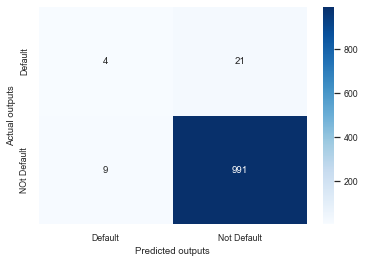

Plot for training results
[06:06:46] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:06:46] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:06:46] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open a

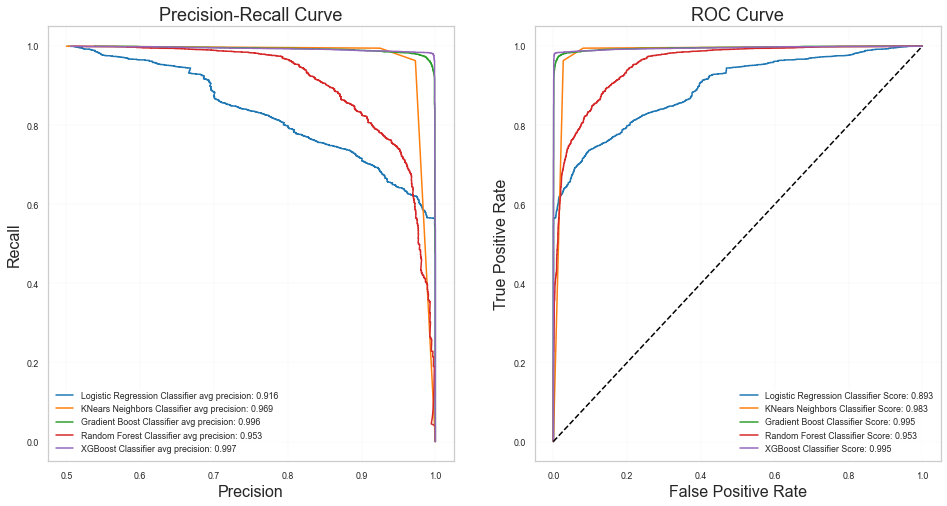

Plot for test results
[06:06:54] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:06:54] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:06:54] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an is

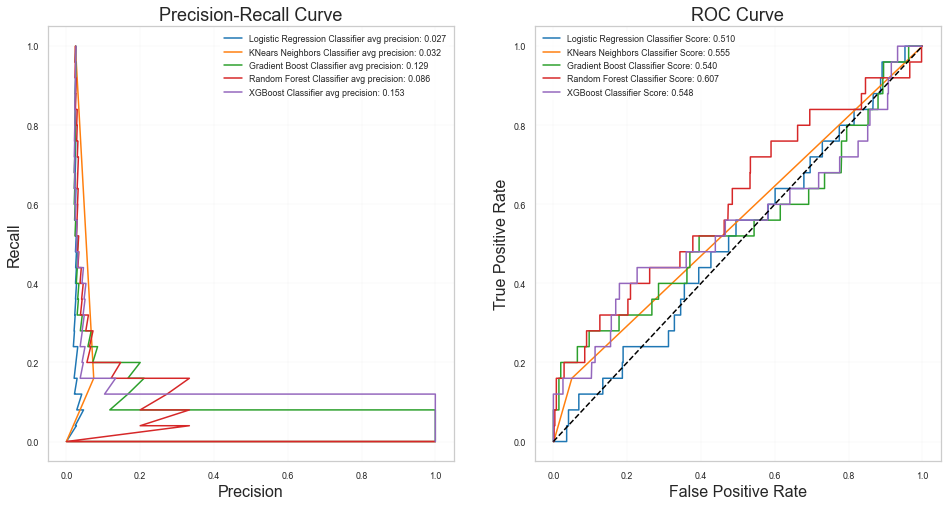

In [45]:
# 5.2.1 Classification Models with Smote Technique - oversampled Dataset
### Experiment 2a: Smote Technique - oversampling to resolve imbalance problem

print("\n************* Classification Oversampling Case - SMOTE **************")

# Intial evaluate train model with 5 fold cross-validation
print("Initial evaluate training model")
cross_validate(X_train, y_train)

# Evaluate model and get result
LR, KNN, GB, RF, XGB = train_test(X_train_sm, y_train_sm, X_test, y_test)

X_train_pca.shape: (8000, 10)

************* PCA applied on Oversampling **************
Best fit parameter for Logistic Regression LogisticRegression(C=0.01, max_iter=10000, random_state=42, solver='liblinear')
Elapsed time 1.71 s

Best fit parameter for KNN KNeighborsClassifier(metric='manhattan', n_neighbors=2)
Effective metric: manhattan
Elapsed time 15.84 s

Best fit parameter for Gradient Boost: GradientBoostingClassifier(max_depth=5, min_samples_leaf=3, random_state=42)
Elapsed time 445.14 s

Best fit parameter for Random Forest: RandomForestClassifier(max_depth=5, min_samples_leaf=4, random_state=42)
Elapsed time 979.19 s
[06:30:57] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find a

[06:31:02] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:31:02] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:31:02] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any su

[06:31:06] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:31:06] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:31:07] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any su

[06:31:13] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:31:13] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:31:14] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any su

[06:31:21] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:31:21] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:31:22] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any su

[06:31:30] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:31:30] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:31:31] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any su

[06:31:38] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:31:38] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:31:39] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any su

[06:31:48] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:31:48] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:31:49] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any su

[06:31:56] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:31:56] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:31:56] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any su

[06:32:01] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:32:01] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:32:01] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any su

[06:32:07] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:32:07] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:32:07] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any su

[06:32:14] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:32:14] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:32:14] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any su

[06:32:21] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:32:21] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:32:21] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any su

[06:32:29] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:32:29] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:32:30] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any su

[06:32:38] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:32:38] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:32:39] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any su

[06:32:48] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:32:48] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:32:49] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any su

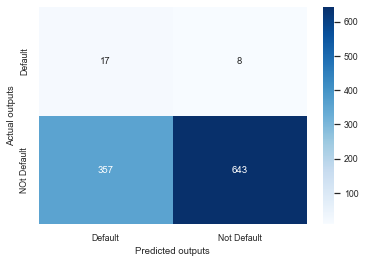


Predict model: KNeighborsClassifier(metric='manhattan', n_neighbors=2)

Training result:
              precision    recall  f1-score   support

           1       0.96      0.97      0.97      4000
           0       0.97      0.96      0.96      4000

    accuracy                           0.97      8000
   macro avg       0.97      0.97      0.97      8000
weighted avg       0.97      0.97      0.97      8000

Testing result:
              precision    recall  f1-score   support

           1       0.13      0.20      0.16        25
           0       0.98      0.97      0.97      1000

    accuracy                           0.95      1025
   macro avg       0.55      0.58      0.56      1025
weighted avg       0.96      0.95      0.95      1025

Confusion matrix: KNeighborsClassifier(metric='manhattan', n_neighbors=2)


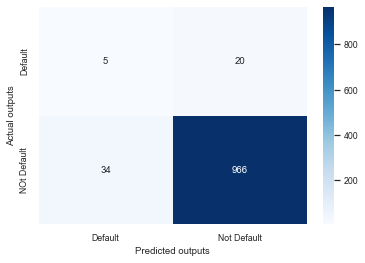


Predict model: GradientBoostingClassifier(max_depth=5, min_samples_leaf=3, random_state=42)

Training result:
              precision    recall  f1-score   support

           1       0.93      0.96      0.94      4000
           0       0.96      0.92      0.94      4000

    accuracy                           0.94      8000
   macro avg       0.94      0.94      0.94      8000
weighted avg       0.94      0.94      0.94      8000

Testing result:
              precision    recall  f1-score   support

           1       0.07      0.20      0.10        25
           0       0.98      0.93      0.95      1000

    accuracy                           0.91      1025
   macro avg       0.52      0.56      0.53      1025
weighted avg       0.96      0.91      0.93      1025

Confusion matrix: GradientBoostingClassifier(max_depth=5, min_samples_leaf=3, random_state=42)


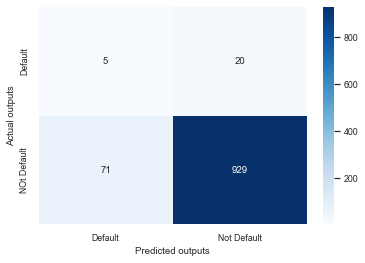


Predict model: RandomForestClassifier(max_depth=5, min_samples_leaf=4, random_state=42)

Training result:
              precision    recall  f1-score   support

           1       0.77      0.90      0.83      4000
           0       0.88      0.72      0.80      4000

    accuracy                           0.81      8000
   macro avg       0.82      0.81      0.81      8000
weighted avg       0.82      0.81      0.81      8000

Testing result:
              precision    recall  f1-score   support

           1       0.04      0.44      0.07        25
           0       0.98      0.73      0.84      1000

    accuracy                           0.72      1025
   macro avg       0.51      0.58      0.45      1025
weighted avg       0.96      0.72      0.82      1025

Confusion matrix: RandomForestClassifier(max_depth=5, min_samples_leaf=4, random_state=42)


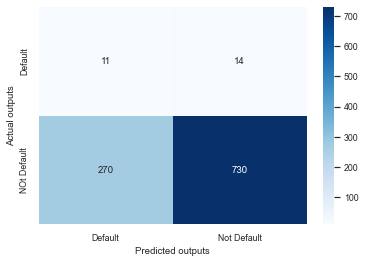


Predict model: XGBClassifier(base_score=0.5, booster='gbtree', class_weight=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              criterion='gini', enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, min_samples_leaf=2, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, ...)
[06:34:28] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually bei

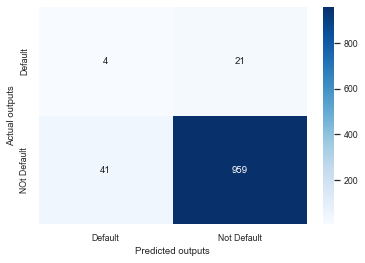

Plot for training results
[06:35:16] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:35:16] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:35:17] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open a

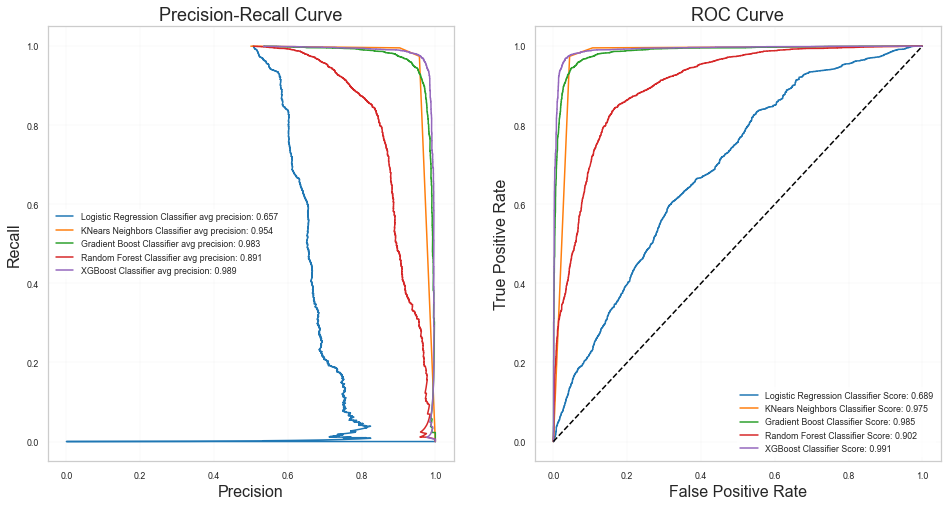

Plot for test results
[06:35:28] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:35:28] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:35:28] WARNING: ..\src\learner.cc:576: 
Parameters: { "criterion", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an is

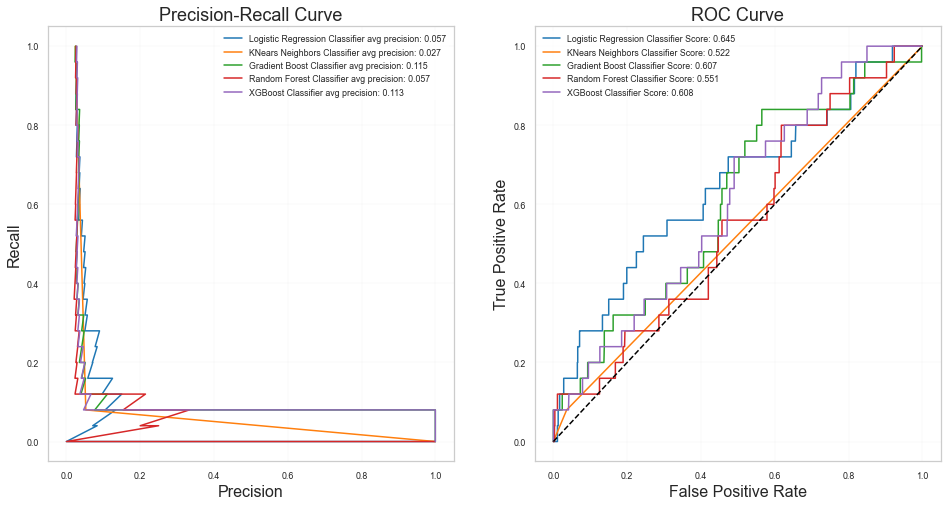

[LogisticRegression(C=0.01, max_iter=10000, random_state=42, solver='liblinear'),
 KNeighborsClassifier(metric='manhattan', n_neighbors=2),
 GradientBoostingClassifier(max_depth=5, min_samples_leaf=3, random_state=42),
 RandomForestClassifier(max_depth=5, min_samples_leaf=4, random_state=42),
 XGBClassifier(base_score=0.5, booster='gbtree', class_weight=None,
               colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
               criterion='gini', enable_categorical=False, gamma=0, gpu_id=-1,
               importance_type=None, interaction_constraints='',
               learning_rate=0.300000012, max_delta_step=0, max_depth=5,
               min_child_weight=1, min_samples_leaf=2, missing=nan,
               monotone_constraints='()', n_estimators=100, n_jobs=8,
               num_parallel_tree=1, predictor='auto', random_state=42,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', validate_parameters=1, ..

In [46]:
# Experiment 2b: PCA on Oversampling
# 5.2.2 Apply pca for first n components 
n = 10
X_train_pca, X_test_pca = apply_PCA(X_train_sm, X_test, COMPONENTS=n)

# Evaluate model and get result
print("\n************* PCA applied on Oversampling **************")
train_test(X_train_pca, y_train_sm, X_test_pca, y_test)


************* ANN Normal Case - Baseline **************
Epoch 1/5
129/129 [==============================] - 3s 3ms/step - loss: 0.5085 - accuracy: 0.7579
Epoch 2/5
129/129 [==============================] - 0s 3ms/step - loss: 0.1369 - accuracy: 0.9761
Epoch 3/5
129/129 [==============================] - 0s 3ms/step - loss: 0.1150 - accuracy: 0.9761
Epoch 4/5
129/129 [==============================] - 0s 3ms/step - loss: 0.1133 - accuracy: 0.9761
Epoch 5/5
33/33 [==============================] - 0s 3ms/step - loss: 0.1120 - accuracy: 0.9756
model evaluation : [0.11203505843877792, 0.9756097793579102]
       reconstruction_error   true_class
count           1025.000000  1025.000000
mean               0.503448     0.024390
std                0.172252     0.154333
min                0.269314     0.000000
25%                0.410644     0.000000
50%                0.469416     0.000000
75%                0.547508     0.000000
max                1.901264     1.000000
              precis

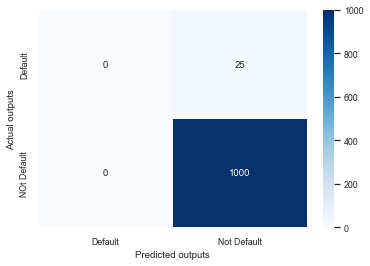

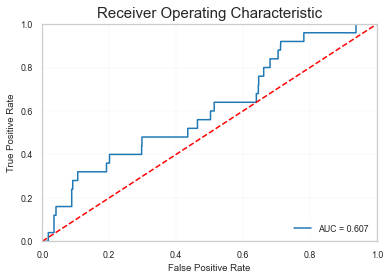

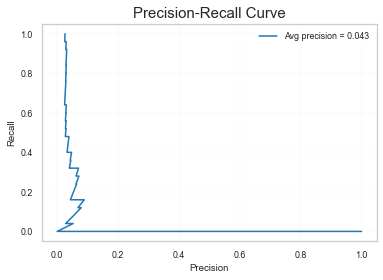

In [43]:
# 5.3.1 Deep Learning Model with Normal Dataset
### Experiment 3a: Apply Artificial Neural Networks - Without doing any sampling

print("\n************* ANN Normal Case - Baseline **************")

# Evaluate model and get result
ANN_model(X_train, y_train, X_test, y_test, epochs=5)


************* ANN Oversampling Case - SMOTE **************
Epoch 1/100
250/250 [==============================] - 1s 3ms/step - loss: 0.6424 - accuracy: 0.6309
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5692 - accuracy: 0.7269
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5133 - accuracy: 0.7676
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4702 - accuracy: 0.7881
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4356 - accuracy: 0.8089
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4058 - accuracy: 0.8246
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3815 - accuracy: 0.8404
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3604 - accuracy: 0.8516
Epoch 9/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3414 - accuracy: 0.8650
Epoch 10/100
250/250 [=========

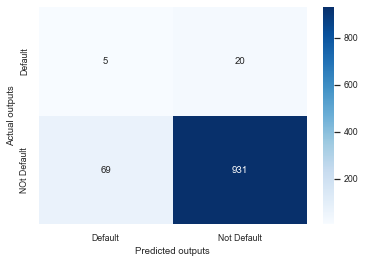

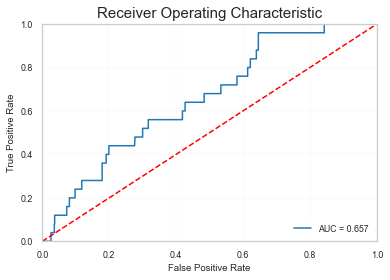

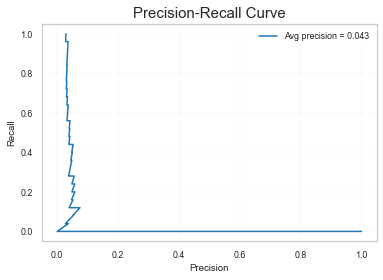

In [44]:
# 5.3.2 Deep Learning Model with Oversampled Dataset
### Experiment 3b: Apply Artificial Neural Networks using Smote Technique sampling

print("\n************* ANN Oversampling Case - SMOTE **************")

# Evaluate model and get result
ANN_model(X_train_sm, y_train_sm, X_test, y_test, epochs=100)